## What are the trending skills for Data Analysts?

#### Methodology
1. __Aggregate Skill Counts__: Sum up skill counts by month.
2. __Recalculate Percentages__: Analyze the data as a percentage of total jobs.
3. __Plot Monthly Demand__: Create a chart to show skill demand trends over time.

### Import Liabrarries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Group Skills by Month
- _Filter Data_: Select job postings for Data Analysts in the Netherlands.
- _Extract Month_: Get the month from each job’s posting date.
- _Format Skills_: Convert the skills column into a list format.
- _Expand Data_: Make sure each skill has its own row in the data.

In [2]:
## Skill count per month for data analysts
df_DA_NL = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Netherlands')].copy()

df_DA_NL['job_posted_month_no'] = df_DA_NL['job_posted_date'].dt.month

# Explode job_skills column
df_DA_NL_explode = df_DA_NL.explode('job_skills')

### Prepare Data for Plotting
- _Create Pivot Table_: Use df_DA_NL_explode to make a pivot table.
- _Set Index and Columns_: Set month as the index and job_skills as the columns.
- _Fill Missing Data_: Replace any missing values with zero.

In [3]:
# Group by month and job_skills
df_DA_NL_pivot = df_DA_NL_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_NL_pivot

job_skills,airflow,airtable,alteryx,ansible,asana,aws,azure,bigquery,c,c++,...,tensorflow,terminal,terraform,unity,vba,visio,webex,windows,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,3,0,6,0,0,14,13,7,1,1,...,0,0,0,1,2,2,1,0,1,1
2,6,0,1,0,0,7,10,2,0,0,...,0,1,0,0,0,0,0,1,2,1
3,1,0,2,0,0,3,8,6,0,0,...,0,1,0,1,4,0,0,0,5,0
4,6,0,0,0,0,5,10,2,1,0,...,4,1,0,0,1,0,0,0,6,0
5,3,0,0,0,0,0,13,2,0,0,...,0,0,0,1,2,0,1,0,6,1
6,0,0,0,0,0,0,12,1,1,2,...,0,0,0,0,0,0,0,0,7,0
7,3,0,1,0,0,3,15,2,1,1,...,0,0,0,0,2,0,0,0,4,0
8,0,0,0,0,0,0,14,2,0,1,...,0,0,0,0,4,0,0,0,5,0
9,0,0,0,0,0,2,7,1,0,1,...,0,0,0,1,2,0,0,0,5,0


### Sort Columns and Update Month Names
- _Add Total Row_: Include a new row labeled "Total" that sums counts for each skill across all months.
- _Sort Columns_: Order the columns by the total counts, from highest to lowest.
- _Update Month Names_: Change month numbers to names.
- _Display Table_: Show the updated pivot table


In [4]:
# sorts by count
df_DA_NL_pivot.loc['Total'] = df_DA_NL_pivot.sum()
df_DA_NL_pivot = df_DA_NL_pivot[df_DA_NL_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_NL_pivot = df_DA_NL_pivot.drop('Total')

df_DA_NL_pivot

job_skills,sql,python,tableau,power bi,excel,azure,r,sas,looker,word,...,svn,graphql,symphony,sharepoint,mariadb,ms access,airtable,notion,opencv,nltk
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,67,46,36,30,19,13,19,10,6,1,...,1,1,1,0,0,0,0,0,0,0
2,40,26,21,15,5,10,9,6,5,2,...,0,0,0,0,0,0,0,0,0,0
3,54,34,15,14,19,8,11,10,6,5,...,0,0,0,1,0,0,0,0,1,1
4,59,37,22,15,16,10,11,14,13,6,...,0,0,0,0,0,0,0,0,0,0
5,43,26,15,15,24,13,10,2,7,6,...,0,0,0,0,0,0,0,0,0,0
6,47,25,10,19,18,12,5,0,1,7,...,0,0,0,0,0,0,0,0,0,0
7,53,37,18,19,13,15,16,6,9,4,...,0,0,0,0,0,0,0,1,0,0
8,47,23,17,14,13,14,7,6,1,5,...,0,0,0,0,0,0,0,0,0,0
9,38,26,14,18,7,7,11,4,2,5,...,0,0,0,0,0,1,0,0,0,0


### Plot Monthly Skill Counts
- _Select Top 5 Skills_: Choose the top 5 skills for data analysts.
- _Create Line Chart_: Plot a line chart showing the counts of these skills by month.
- _Index by Month_: Use months as the x-axis.

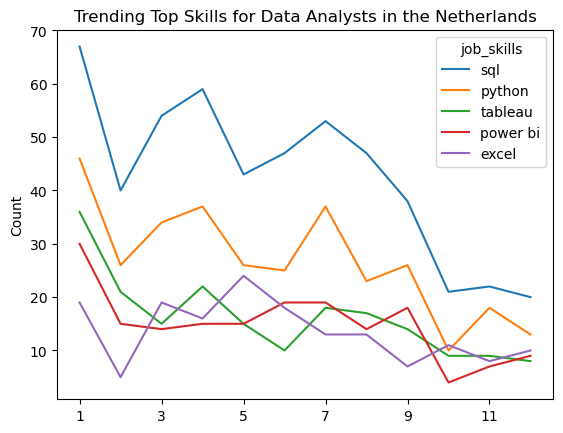

In [5]:
df_DA_NL_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the Netherlands')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

Totals can be misleading without context. Percentages provide a clearer view of how each part relates to the whole, making comparisons more accurate.

### Calculate Percentage of Total Jobs
- _Count Monthly Entries_: Group the data by month and count the entries for each month in df_DA.
- _Store Results_: Save these counts in DA_totals. This will be used to calculate the percentages.

In [6]:
# Get monthly totals
DA_totals = df_DA_NL.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     101
2      48
3      77
4      78
5      67
6      75
7      81
8      64
9      54
10     43
11     38
12     41
dtype: int64

### Calculate Skill Percentages
This code calculates the percentage of each skill's occurrence each month. It does this by dividing the skill counts in the first 12 rows of df_DA_pivot by the monthly totals in DA_totals, then multiplying by 100. The resulting DataFrame, df_DA_pivot_percent, shows skill distributions as percentages of the total job entries each month.

In [7]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_NL_percent = df_DA_NL_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_NL_percent = df_DA_NL_percent.reset_index()
df_DA_NL_percent['job_posted_month'] = df_DA_NL_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_NL_percent = df_DA_NL_percent.set_index('job_posted_month')
df_DA_NL_percent = df_DA_NL_percent.drop(columns='job_posted_month_no')

df_DA_NL_percent

job_skills,sql,python,tableau,power bi,excel,azure,r,sas,looker,word,...,svn,graphql,symphony,sharepoint,mariadb,ms access,airtable,notion,opencv,nltk
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,66.336634,45.544554,35.643564,29.702970,18.811881,12.871287,18.811881,9.900990,5.940594,0.990099,...,0.990099,0.990099,0.990099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,83.333333,54.166667,43.750000,31.250000,10.416667,20.833333,18.750000,12.500000,10.416667,4.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,70.129870,44.155844,19.480519,18.181818,24.675325,10.389610,14.285714,12.987013,7.792208,6.493506,...,0.000000,0.000000,0.000000,1.298701,0.000000,0.000000,0.000000,0.000000,1.298701,1.298701
Apr,75.641026,47.435897,28.205128,19.230769,20.512821,12.820513,14.102564,17.948718,16.666667,7.692308,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,64.179104,38.805970,22.388060,22.388060,35.820896,19.402985,14.925373,2.985075,10.447761,8.955224,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,62.666667,33.333333,13.333333,25.333333,24.000000,16.000000,6.666667,0.000000,1.333333,9.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,65.432099,45.679012,22.222222,23.456790,16.049383,18.518519,19.753086,7.407407,11.111111,4.938272,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.234568,0.000000,0.000000
Aug,73.437500,35.937500,26.562500,21.875000,20.312500,21.875000,10.937500,9.375000,1.562500,7.812500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,70.370370,48.148148,25.925926,33.333333,12.962963,12.962963,20.370370,7.407407,3.703704,9.259259,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.851852,0.000000,0.000000,0.000000,0.000000


### Plot Monthly Skill Demand
Create a line plot showing the top five skills for data analysts as percentages of total job entries each month. Use the first 5 columns from df_DA_pivot_percent for the plot. Move the legend outside the plot for better readability.

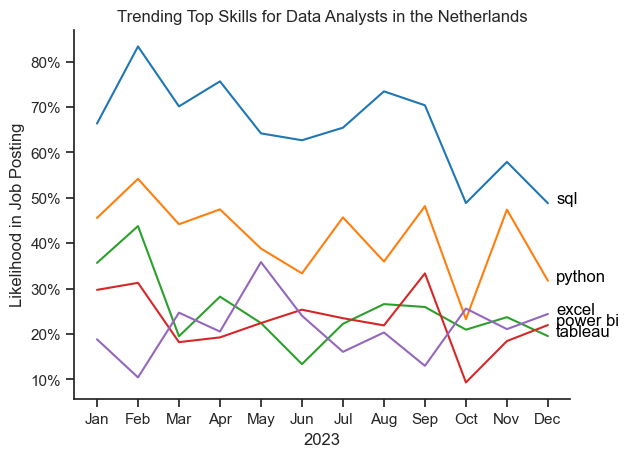

In [11]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_NL_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the Netherlands')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()